In [ ]:
pip install tweepy

In [ ]:
pip install textblob

In [ ]:
pip install wordcloud

In [ ]:
pip install langdetect

In [2]:
import tweepy
import textblob

In [3]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
import string
import os
import sys

In [4]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect

In [5]:
#authentication for api

In [6]:
consumerKey="On6lgMcJjrSYoIEdadWhlYOkd"
consumerSecret="qwhlSUuWZZpNisuNsyiaz39pjs4a9DApTpF2C0MTHJCj2UDokS"
accessToken="1058627571569451008-ZuWA8w2nAOdait7Om37O88qbTjfCwm"
accessTokenSecret="pE1t7c0qXyc4G0bECVXJXWBSMcFcQ6xCatkl3mRZfmiKS"

auth=tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
def percentage(part,whole):
    return 100* float(part)/float(whole)

keyword=input("Enter keyword or hashtag to search !!")
no_tweets=int(input("Enter number of tweets to analyze"))

tweets=tweepy.Cursor(api.search_tweets,q=keyword).items(no_tweets)
positive=0
negative=0
neutral=0
polarity=0
tweets_list=[]
positive_list=[]
negative_list=[]
neutral_list=[]

for tweet in tweets:
    tweets_list.append(tweet.text)
    analysis=TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)       # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary.  which contains pos, neg, neu, and compound scores.
    neg=score['neg']
    neu=score['neu']
    pos=score['pos']
    comp=score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg>pos:
        negative_list.append(tweet.text)
        negative += 1
        
    elif pos>neg:
        positive_list.append(tweet.text)
        positive += 1
        
    elif pos==neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
positive=percentage(positive,no_tweets)
negative=percentage(negative,no_tweets)
neutral=percentage(neutral,no_tweets)
polarity=percentage(polarity,no_tweets)
polarity = percentage(polarity, no_tweets)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 

Enter keyword or hashtag to search !!covid
Enter number of tweets to analyze100


In [9]:
tweets_list = pd.DataFrame(tweets_list)
positive_list = pd.DataFrame(positive_list)
negative_list = pd.DataFrame(negative_list)
neutral_list = pd.DataFrame(neutral_list)

print("Total number of tweets: ",len(tweets_list))
print("Positive number of tweets: ",len(positive_list))
print("Negative number of tweets: ", len(negative_list))
print("Neutral number of tweets: ",len(neutral_list))

Total number of tweets:  100
Positive number of tweets:  31
Negative number of tweets:  21
Neutral number of tweets:  48


In [10]:
tweets_list

,0
0,Es mi primer fin de semana libre desde hace 6 ...
1,"Over the course of this pandemic, CDC and medi..."
2,RT @TheBrightSidePK: Meet the former health mi...
3,RT @TheUSASingers: Simone Biles is one of the ...
4,@johnandi @MrsAstronaut I think you’re a bit l...
...,...
95,RT @NLFD_org: A small group of highly networke...
96,@SkyNews @joncraig You all think Boris was bad...
97,RT @samanthamarika1: Are they really going to ...
98,RT @DickTra81776167: Study out of Sweden shows...


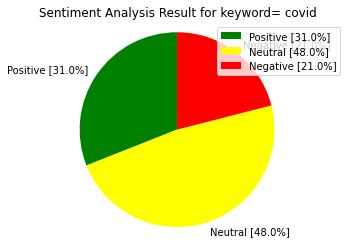

In [11]:
#creating piechart

labels= ['Positive [' +positive+ '%]','Neutral [' +neutral+ '%]','Negative [' +negative+ '%]']
sizes=[positive,neutral,negative]
colors=['green','yellow','red']
plt.pie(sizes,labels=labels,colors=colors,startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [12]:
tweets_list.drop_duplicates(inplace=True)

In [13]:
tweets_list

,0
0,Es mi primer fin de semana libre desde hace 6 ...
1,"Over the course of this pandemic, CDC and medi..."
2,RT @TheBrightSidePK: Meet the former health mi...
3,RT @TheUSASingers: Simone Biles is one of the ...
4,@johnandi @MrsAstronaut I think you’re a bit l...
...,...
94,RT @skaschep: For sale: one standing GA ticket...
95,RT @NLFD_org: A small group of highly networke...
96,@SkyNews @joncraig You all think Boris was bad...
97,RT @samanthamarika1: Are they really going to ...


In [14]:
tw_list=pd.DataFrame(tweets_list)

In [15]:
tw_list["text"]=tw_list[0]

In [16]:
tw_list

,0,text
0,Es mi primer fin de semana libre desde hace 6 ...,Es mi primer fin de semana libre desde hace 6 ...
1,"Over the course of this pandemic, CDC and medi...","Over the course of this pandemic, CDC and medi..."
2,RT @TheBrightSidePK: Meet the former health mi...,RT @TheBrightSidePK: Meet the former health mi...
3,RT @TheUSASingers: Simone Biles is one of the ...,RT @TheUSASingers: Simone Biles is one of the ...
4,@johnandi @MrsAstronaut I think you’re a bit l...,@johnandi @MrsAstronaut I think you’re a bit l...
...,...,...
94,RT @skaschep: For sale: one standing GA ticket...,RT @skaschep: For sale: one standing GA ticket...
95,RT @NLFD_org: A small group of highly networke...,RT @NLFD_org: A small group of highly networke...
96,@SkyNews @joncraig You all think Boris was bad...,@SkyNews @joncraig You all think Boris was bad...
97,RT @samanthamarika1: Are they really going to ...,RT @samanthamarika1: Are they really going to ...


In [17]:
#cleaning the tweets
import emoji
def cleantext(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions
    text=re.sub(r'RT[\s]+','',text)   #remove RT for retweets
    text=re.sub(r'https?:\/\/\S+','',text)  #remove urls
    text=re.sub(r'#','',text)  #remove hashtags
    text=re.sub(emoji.get_emoji_regexp(),r'',text)
    text=text.translate(str.maketrans('','',string.punctuation))
    return text

tw_list["text"]=tw_list["text"].apply(cleantext)
tw_list

C:\Users\asus\AppData\Local\Temp\ipykernel_12888\1107855226.py:8: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  text=re.sub(emoji.get_emoji_regexp(),r'',text)


,0,text
0,Es mi primer fin de semana libre desde hace 6 ...,Es mi primer fin de semana libre desde hace 6 ...
1,"Over the course of this pandemic, CDC and medi...",Over the course of this pandemic CDC and medic...
2,RT @TheBrightSidePK: Meet the former health mi...,Meet the former health minister YasminRashid ...
3,RT @TheUSASingers: Simone Biles is one of the ...,Simone Biles is one of the greatest gymnasts ...
4,@johnandi @MrsAstronaut I think you’re a bit l...,I think you’re a bit lost on that one John…\...
...,...,...
94,RT @skaschep: For sale: one standing GA ticket...,For sale one standing GA ticket for Bologna S...
95,RT @NLFD_org: A small group of highly networke...,org A small group of highly networked well fun...
96,@SkyNews @joncraig You all think Boris was bad...,You all think Boris was bad this idiot will ...
97,RT @samanthamarika1: Are they really going to ...,Are they really going to run with covid AGAIN


In [18]:
tw_list[['polarity','subjectivity']]=tw_list['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))
for index,row in tw_list['text'].iteritems():       #iteritems func is used to iterate each item of each column
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg=score['neg']
    neu=score['neu']
    pos=score['pos']
    comp=score['compound']
    if neg>pos:
        tw_list.loc[index,'sentiment']="negative"
    elif pos>neg:
        tw_list.loc[index,'sentiment']="positive"
    else:
        tw_list.loc[index,'sentiment']="neutral"
    tw_list.loc[index,'neg']=neg
    tw_list.loc[index,'neu']=neu
    tw_list.loc[index,'pos']=pos
    tw_list.loc[index,'compound']=comp

tw_list
        
    

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Es mi primer fin de semana libre desde hace 6 ...,Es mi primer fin de semana libre desde hace 6 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,"Over the course of this pandemic, CDC and medi...",Over the course of this pandemic CDC and medic...,0.133333,0.380952,positive,0.000,0.913,0.087,0.2023
2,RT @TheBrightSidePK: Meet the former health mi...,Meet the former health minister YasminRashid ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @TheUSASingers: Simone Biles is one of the ...,Simone Biles is one of the greatest gymnasts ...,1.000000,1.000000,positive,0.000,0.714,0.286,0.8555
4,@johnandi @MrsAstronaut I think you’re a bit l...,I think you’re a bit lost on that one John…\...,0.000000,0.000000,negative,0.216,0.673,0.111,-0.2960
...,...,...,...,...,...,...,...,...,...
94,RT @skaschep: For sale: one standing GA ticket...,For sale one standing GA ticket for Bologna S...,-0.125000,0.375000,positive,0.000,0.856,0.144,0.4939
95,RT @NLFD_org: A small group of highly networke...,org A small group of highly networked well fun...,-0.045000,0.470000,positive,0.111,0.774,0.115,0.0202
96,@SkyNews @joncraig You all think Boris was bad...,You all think Boris was bad this idiot will ...,-0.633333,0.688889,negative,0.466,0.534,0.000,-0.9202
97,RT @samanthamarika1: Are they really going to ...,Are they really going to run with covid AGAIN,0.200000,0.200000,neutral,0.000,1.000,0.000,0.0000


In [19]:
positive_tw_list=tw_list[tw_list['sentiment']=="positive"]
negative_tw_list=tw_list[tw_list['sentiment']=="negative"]
neutral_tw_list=tw_list[tw_list['sentiment']=="neutral"]

In [20]:
def count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    
    #With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
count_values(tw_list,"sentiment")

,Total,Percentage
neutral,44,46.32
positive,30,31.58
negative,21,22.11


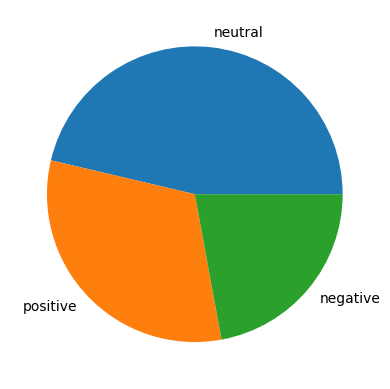

In [21]:
pc=count_values(tw_list,"sentiment")
names=pc.index
size=pc["Percentage"]

plt.pie(size,labels=names)
plt.show()

In [22]:
# function to create wordcloud

def wordcloud(text):
    mask=np.array(Image.open("cloud.jpg"))
    stopwords=set(STOPWORDS)
    wc=WordCloud(background_color="white",mask = mask, stopwords=stopwords)
    wc.generate(str(text))
    
    wc.to_file("wc.jpg")
    path="wc.jpg"
    display(Image.open(path))

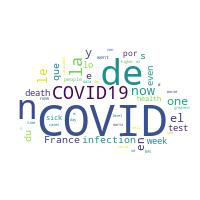

In [23]:
wordcloud(tw_list["text"].values)

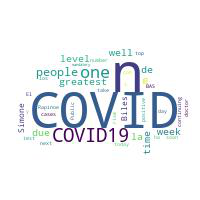

In [24]:
wordcloud(positive_tw_list["text"].values)

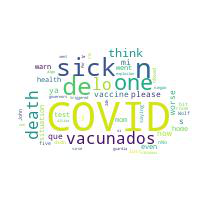

In [25]:
wordcloud(negative_tw_list["text"].values)

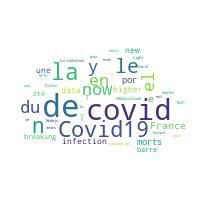

In [26]:
wordcloud(neutral_tw_list["text"].values)

In [27]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#remove punctuation

def remove_punct(text):
    text="".join([char for char in text if char not in string.punctuation])
    text=re.sub('[0-9]','',text)
    return text

tw_list['punct']=tw_list['text'].apply(lambda x: remove_punct(x))

#apply tokenization

def tokenization(text):
    text=re.split("\W+",text)
    return text
tw_list['tokenized']=tw_list['punct'].apply(lambda x:tokenization(x.lower()))

#removing stopwords

stopword=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
tw_list['non_stop']=tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

ps=nltk.PorterStemmer()
def stemming(text):
    text=[ps.stem(word) for word in text]
    return text
tw_list['Stemmed']=tw_list['non_stop'].apply(lambda x: stemming(x))

tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,non_stop,Stemmed
0,Es mi primer fin de semana libre desde hace 6 ...,Es mi primer fin de semana libre desde hace 6 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,Es mi primer fin de semana libre desde hace m...,"[es, mi, primer, fin, de, semana, libre, desde...","[es, mi, primer, fin, de, semana, libre, desde...","[es, mi, primer, fin, de, semana, libr, desd, ..."
1,"Over the course of this pandemic, CDC and medi...",Over the course of this pandemic CDC and medic...,0.133333,0.380952,positive,0.000,0.913,0.087,0.2023,Over the course of this pandemic CDC and medic...,"[over, the, course, of, this, pandemic, cdc, a...","[course, pandemic, cdc, medical, officials, sa...","[cours, pandem, cdc, medic, offici, said, time..."
2,RT @TheBrightSidePK: Meet the former health mi...,Meet the former health minister YasminRashid ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,Meet the former health minister YasminRashid ...,"[, meet, the, former, health, minister, yasmin...","[, meet, former, health, minister, yasminrashi...","[, meet, former, health, minist, yasminrashid,..."
3,RT @TheUSASingers: Simone Biles is one of the ...,Simone Biles is one of the greatest gymnasts ...,1.000000,1.000000,positive,0.000,0.714,0.286,0.8555,Simone Biles is one of the greatest gymnasts ...,"[, simone, biles, is, one, of, the, greatest, ...","[, simone, biles, one, greatest, gymnasts, tim...","[, simon, bile, one, greatest, gymnast, time, ..."
4,@johnandi @MrsAstronaut I think you’re a bit l...,I think you’re a bit lost on that one John…\...,0.000000,0.000000,negative,0.216,0.673,0.111,-0.2960,I think you’re a bit lost on that one John…\...,"[, i, think, you, re, a, bit, lost, on, that, ...","[, think, bit, lost, one, john, read, room, pl...","[, think, bit, lost, one, john, read, room, pl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,RT @skaschep: For sale: one standing GA ticket...,For sale one standing GA ticket for Bologna S...,-0.125000,0.375000,positive,0.000,0.856,0.144,0.4939,For sale one standing GA ticket for Bologna S...,"[, for, sale, one, standing, ga, ticket, for, ...","[, sale, one, standing, ga, ticket, bologna, s...","[, sale, one, stand, ga, ticket, bologna, sund..."
95,RT @NLFD_org: A small group of highly networke...,org A small group of highly networked well fun...,-0.045000,0.470000,positive,0.111,0.774,0.115,0.0202,org A small group of highly networked well fun...,"[org, a, small, group, of, highly, networked, ...","[org, small, group, highly, networked, well, f...","[org, small, group, highli, network, well, fun..."
96,@SkyNews @joncraig You all think Boris was bad...,You all think Boris was bad this idiot will ...,-0.633333,0.688889,negative,0.466,0.534,0.000,-0.9202,You all think Boris was bad this idiot will ...,"[, you, all, think, boris, was, bad, this, idi...","[, think, boris, bad, idiot, make, things, eve...","[, think, bori, bad, idiot, make, thing, even,..."
97,RT @samanthamarika1: Are they really going to ...,Are they really going to run with covid AGAIN,0.200000,0.200000,neutral,0.000,1.000,0.000,0.0000,Are they really going to run with covid AGAIN,"[, are, they, really, going, to, run, with, co...","[, really, going, run, covid]","[, realli, go, run, covid]"


In [33]:
#count_vectorizer

def cleantext_toAnalyze(text):
    text_lc="".join([word.lower() for word in text if word not in string.punctuation])
    text_rc=re.sub(r'[0-9]+','',text_lc)
    token=re.split('W+',text_rc)
    text=[ps.stem(word) for word in token if word not in stopword]
    return text

In [41]:
countVectorizer=CountVectorizer(analyzer=cleantext_toAnalyze)  #creating object countvectorizer
countVector=countVectorizer.fit_transform(tw_list['text'])


count_vec_df=pd.DataFrame(countVector.toarray(),columns=countVectorizer.get_feature_names_out())
count_vec_df


,,\njavascript girlswhocode messi nfts python java daysofcode nodejs mufc de jong…,\njavascript girlswhocode messi nfts python java daysofcode nodejs mufc de jong mainaandki…,joe is lying and you dont see it when covid hit states shut down the economy and million l…,blondie yeahi hadn’t been sick at all then had a horrible noncovid co…,court i wouldnt doubt it it does a number on some peoples immune systems my husband…,covid on était en droit d’attendre du ministère de la santé une information honnête respectueuse des données scientifiqu…,he can be counted on to consistently vote against all of those things you just mentioned…,i think you’re a bit lost on that one john…\nread the room please\nno one’s saying he didn…,il y a eu des études scientifique la dessus le port du masque est complètement inutile cont…,...,org a small group of highly networked well funded licensed doctors are spreading covid misinformation and disinformation for pol…,org i believe that misinformation is now our leading cause of death” he said naming ongoing covid vaccine hesitancy the num…,over the course of this pandemic cdc and medical officials have said time and time again how important physical ac…,restrepo klaas lodewyck y wilfred peeters directores del alphavinyl dieron positivos por covid y dejan momentáneamente e…,spain italy france the latest covid rules if you test positive while on holiday in europe\n,the designs of high quality surveys have undergone considerable changes in recent years changes which are now bein…,the public attorneys office has expressed optimism that pres marcos jr bbm is fully supporting republic act …,todays winners of my covid cultist award \n\nps bonus points are due to our evan top right for slipping in cou…,u news,uncut les malcomprenants qui croient avoir raison \nre masques \n\nnon je lui conseillerai darrêter de respirer pdt qlq jo…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
